# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Import Confusion Matrix for Fold 1

In [2]:
x = pd.read_csv("./crossvalidation_results/fold1_validationset_confusionmatrix.csv", header=None)

new_x = x.copy()
for i in range(1,25):
	for j in range(1,25):
		if (i != j):
			new_x.iloc[i,j] = int(x.iloc[i,j]) + int(x.iloc[j,i])
		else:
			new_x.iloc[i,j] = 0
print(new_x)

                  0               1               2        3            4   \
0             Cancer  Bone-Osteosarc  Breast-AdenoCA  CNS-GBM  CNS-Medullo   
1     Bone-Osteosarc               0               1        0            0   
2     Breast-AdenoCA               1               0        0            3   
3            CNS-GBM               0               0        0            0   
4        CNS-Medullo               0               3        0            0   
5      CNS-PiloAstro               0               2        4           10   
6   ColoRect-AdenoCA               0               0        0            5   
7        Eso-AdenoCA               0               0        0            0   
8           Head-SCC               0               0        0            0   
9       Kidney-ChRCC               0               6        0            3   
10        Kidney-RCC               0               2        0            6   
11         Liver-HCC               0               6        0   

Binarize the cells

In [3]:
bin_x = x.copy()
for i in range(1,25):
	for j in range(1,25):
		if (new_x.iloc[i,j] != 0):
			bin_x.iloc[i,j] = 1
		else:
			bin_x.iloc[i,j] = 0

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 144

In [8]:
col_vals = bin_x.iloc[0].iloc[1:]
draw_x  = bin_x.iloc[1:]

draw_x = draw_x.drop(draw_x.columns[0], axis=1)
draw_x = draw_x.astype('float')

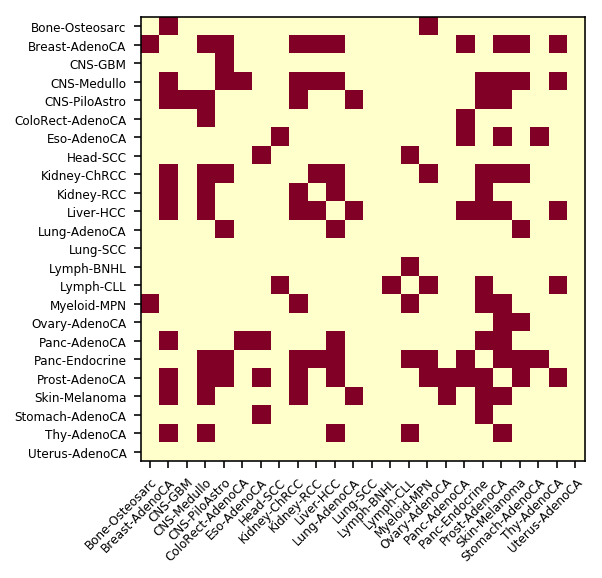

In [11]:
matplotlib.rcParams.update({'font.size': 6})


fig, ax = plt.subplots()
# im = ax.imshow(newx, cmap="YlGn")


im = ax.imshow(draw_x, cmap="YlOrRd")

ax.set_xticks(np.arange(len(col_vals.values)))
ax.set_yticks(np.arange(len(col_vals.values)))

ax.set_xticklabels(col_vals.values)
ax.set_yticklabels(col_vals.values)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(newx.columns.values)):
#     for j in range(len(newx.columns.values)):
#         text = ax.text(j, i, round(newx.values[i, j], 2),
#                        ha="center", va="center", color="w")

fig.tight_layout()
plt.show()